# Analysis of Paleo-present Climate Data
***

## Background
Paleoclimatology is the study of the climate history of earth [1]. This science allows for a better understanding of the climate of Earth in the past and how it relates to present and future climates on the planet. Earths climate past cannot be found in modern records. Therefore, scientists must gather data preserved in nature over the millennia in paleological remains referred to as proxy records [1]. An example of a type of proxy data is when scientists drill into ice sheets and extract ice cores to analyse deposits trapped within the ice, such as pollen and gas [1]. This gives insights into the atmospheric and climatic conditions that existed when particular layers of the sheet formed. These studies have shown that the climate of Earth is always changing. Research revealed that there have been several ice ages as well as several periods of global warming [1]. An ice age is a period of colder global temperatures and recurring glacial expansion capable of lasting hundreds of millions of years [2]. Paleoclimatology has shown that other enviromental factors such as continental drift, greenhouses gases in the atmosphere, solar energy, and the variation in Earth’s orbit have all affected the climate of Earth over time. This type of science is vital to our understanding of climate on Earth. Models can be developed to help predict how increased carbon dioxide levels and other changes may impact the climate of Earth in years to come. 

## Data Collection and Loading

In [1]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt

### CO2 Data
The CO2 data being analysed is a composite dataset derived from Antartic ice cores. The dataset spans over a timeframe of 800,000 years before the present (yrBP) to the year 2001, where 1950 is the present date. This composite, presented by Bereiter et al. in 2014, revises the earlier Lüthi et al. (2008) version. The  atmospheric CO2 concentrations is measured in parts per million by volume (ppmv) at various points in time. The age unit is measured in years before present.  

In [2]:
# Load CO2 data.
co2_data = pd.read_excel('data/new_atmospheric_CO2.xls', sheet_name='CO2 Composite', skiprows=range(14))

In [3]:
co2_data.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


### Mauna Loa CO2 Data
The Mauna Loa data has the the latest anthropogenic data. Since 1958, the atmospheric carbon dioxide (CO2) concentration measurements were collected at the Mauna Loa Observatory in Hawaii. The observatory is in prime location to sample the Earths air. It is situated on the side of Mauna Loa, the world’s largest active volcano. The observatory is approximately 3,400 meters above sea level and remains a long distance away from significant pollution sources [4]. This means the air is relatively clean. The Mauna Loa Observatory allows scientists to understand the ongoing increase in greenhouse gas concentrations. The measurements are essential for assessing  the impact of human-induced climate change on the Earth's atmosphere. National Oceanic and Atmospheric Administration (NOAA) maintained the dataset. 

In [4]:
# Load Mauna Loa data [3].
# https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/
mauna_loa_data = pd.read_csv('data/mlo_data.csv',
                             skiprows = [i for i in range(1, 44)])

In [5]:
mauna_loa_data.head()

,year,mean,unc
0,2002,373.45,0.12
1,2003,375.98,0.12
2,2004,377.70,0.12
3,2005,379.98,0.12
4,2006,382.09,0.12


### Temperature

In [6]:
# Load Temperature data.
temp_df = pd.read_excel('data/epicaDC.deuttemp.EDC3-AICC.xls')

In [7]:
temp_df.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


### CH4 Data
Atmospheric methane is an important greenhouse gas and a sensitive indicator of climate change and millennial-scale temperature variability [7]. Over the past 650,000 years, the concentration of CH4 has varied between approximately 350 and 800 parts per 10e9 by volume (p.p.b.v) during glacial and interglacial 
periods, respectively. The data presented below is the history of this greenhouse gas to 800,000 yr before present. Methane, colourless, odourless gas that occurs abundantly in nature and as a product of certain human activities [8]. It is known as one of the most potent greenhouse gases. 

In [34]:
# Define the column names
columns = ['Depth', 'Gas Age', 'CH4 Mean', '1s', 'Lab']

In [37]:
# Read the text file starting from line 154
ch4_data = pd.read_csv("data/edc-ch4-2008.txt", skiprows=154, delim_whitespace=True, names=columns, engine='python')

In [38]:
# Display the extracted CH4 data
print(ch4_data)

        Depth  Gas Age  CH4 Mean    1s Lab
0       99.34       13       907  10.0   b
1      102.45      126       784  10.0   g
2      102.58      130       762  10.0   b
3      103.34      151       710  10.0   g
4      104.33      184       727  10.0   g
...       ...      ...       ...   ...  ..
2098  3188.08   794938       428  10.0   g
2099  3188.95   796320       418  10.0   b
2100  3189.43   797277       396  10.0   g
2101  3190.03   798417       458  10.0   g
2102  3190.53   799396       399  10.0   g

[2103 rows x 5 columns]


## Data Processing

### CO2 Data

In [8]:
# Remove extra spaces from column names.
co2_data.columns = co2_data.columns.str.strip()

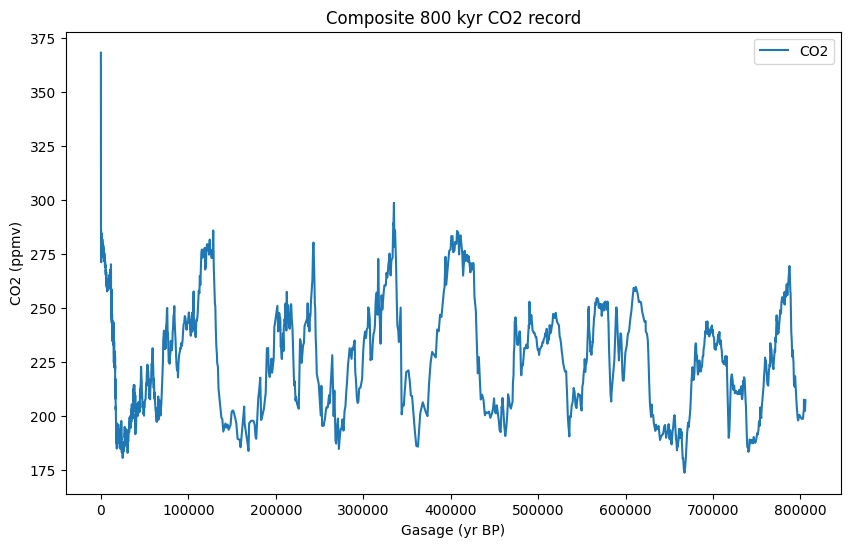

In [9]:
# Plot Composite 800 kyr CO2 record.
plt.figure(figsize=(10, 6))
plt.plot(co2_data['Gasage (yr BP)'], co2_data['CO2 (ppmv)'], label='CO2')
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.title('Composite 800 kyr CO2 record')
plt.legend()
plt.show()


### Mauna Loa Data
The Mauna Loa data and the historical Antarctic ice core records must be merged to allow for a comprehensive analysis of the long-term trends in atmospheric CO2 concentrations. In order to merge the datasets, a few adjustments had to be made to the Mauna Loa data. This was to ensure  compatibility between the two datasets. Specifically, the age unit was aligned by calculating the *'Gasage (yr BP)'* column to match the reference year of 1950, facilitating a seamless integration of the two datasets. Additionally, the *mean* column in the Mauna Loa data was renamed to *'CO2 (ppmv)'* for consistency with the Antarctic ice core data.

In [10]:
# Adjustments of Mauna Loa data required to merge datasets.
# Age unit adjustment.
reference_year = 1950
mauna_loa_data['Gasage (yr BP)'] = reference_year - mauna_loa_data['year']

# Convert 'Gasage (yr BP)' to float in the dataframe
mauna_loa_data['Gasage (yr BP)'] = mauna_loa_data['Gasage (yr BP)'].astype(float)

# Rename column to match CO2 dataset.
# https://stackoverflow.com/questions/46066685/rename-the-column-inside-csv-file
mauna_loa_data = mauna_loa_data.rename(columns=({'mean':'CO2 (ppmv)'}))

# Extract relevant columns.
mlo_data = mauna_loa_data[['Gasage (yr BP)', 'CO2 (ppmv)']]

### Merging CO2 Data and Mauna Loa Data

In [11]:
# Merge CO2 data and Mauna Loa data.
merged_data = pd.concat([mauna_loa_data, co2_data[['Gasage (yr BP)', 'CO2 (ppmv)']]])

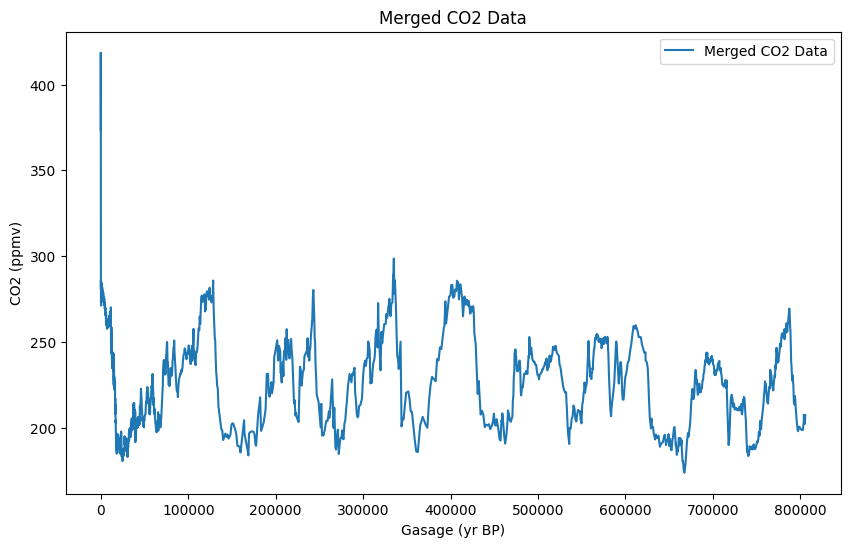

In [12]:
# Plot the merged data.
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Gasage (yr BP)'], merged_data['CO2 (ppmv)'], label='Merged CO2 Data')
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.title('Merged CO2 Data')
plt.legend()
plt.show()

### Temperature
A temperature anomly is the difference between a temperauture and an average temperature [5]. The average temperature is usually referred to as the baseline temperature. The baseline temperature choosen depends on the size of the dataset. Generally, a common approach is to use a pre-industrial period when human-induced climate change was minimal. However, the baseline choosen in this section was based on a pre-existing dataset. The dataset "EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates" [6] contains roughly the same data as the *temp_df* in this notebook. However, the temperature information is stored as a temperature anomly rather than the measured Kelvin. This section will focus on converting the Kelvin values to temperature anomlies. 

The *EPICA* dataset states the "Temperature estimate" column is the temperature difference from the average of the last 1000 years [6]. The start baseline is a reference period for which the average temperature can be calculated. In this case, 950 as it is 1000 years before present. The present date (1950) is choosen to be the end date. The average temperature between 950 and 1950 of the data must be found. The average serves as the baseline against which temperature anomalies are calculated. Once, the average temperature is subtracted from each individual temperature measurement, it is possible to see the temperature anomaly.

In [13]:
# Rename column to match merged dataset.
temp_df = temp_df.rename(columns=({'EDC3béta':'Gasage (yr BP)'}))

In [14]:
# Calculate the average temperature over the last 1000 years
# https://letstalkscience.ca/educational-resources/backgrounders/climate-math
baseline_start_year = 950
baseline_end_year = 1950
baseline_data = temp_df[(temp_df['Gasage (yr BP)'] >= baseline_start_year) & (temp_df['Gasage (yr BP)'] <= baseline_end_year)]
average_temperature = baseline_data['temp'].mean()

In [15]:
# Calculate temperature anomalies
temp_df['Temperature Anomaly (Kelvin)'] = temp_df['temp'] - average_temperature

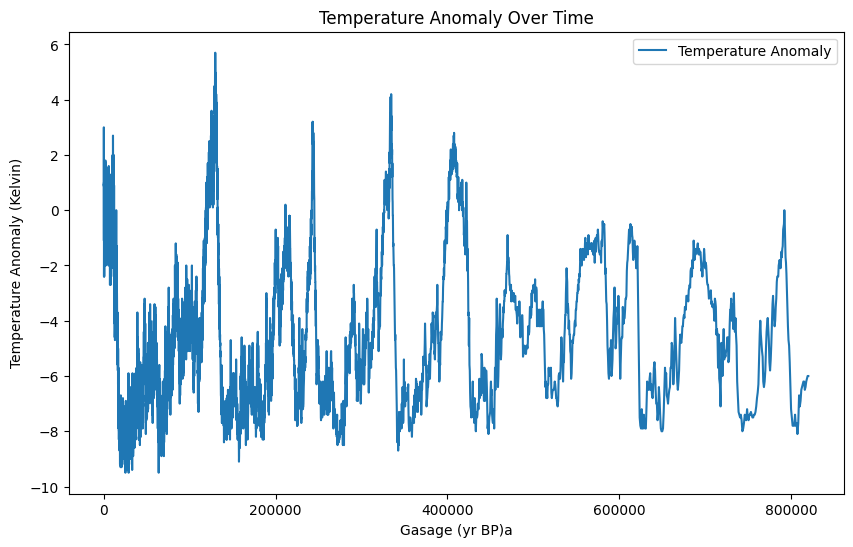

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(temp_df['Gasage (yr BP)'], temp_df['Temperature Anomaly (Kelvin)'], label='Temperature Anomaly')
plt.xlabel('Gasage (yr BP)a')
plt.ylabel('Temperature Anomaly (Kelvin)')
plt.title('Temperature Anomaly Over Time')
plt.legend()
plt.show()

### CH4 Data

In [39]:
# Rename column to match merged dataset.
ch4_data = ch4_data.rename(columns=({'Gas Age':'Gasage (yr BP)'}))

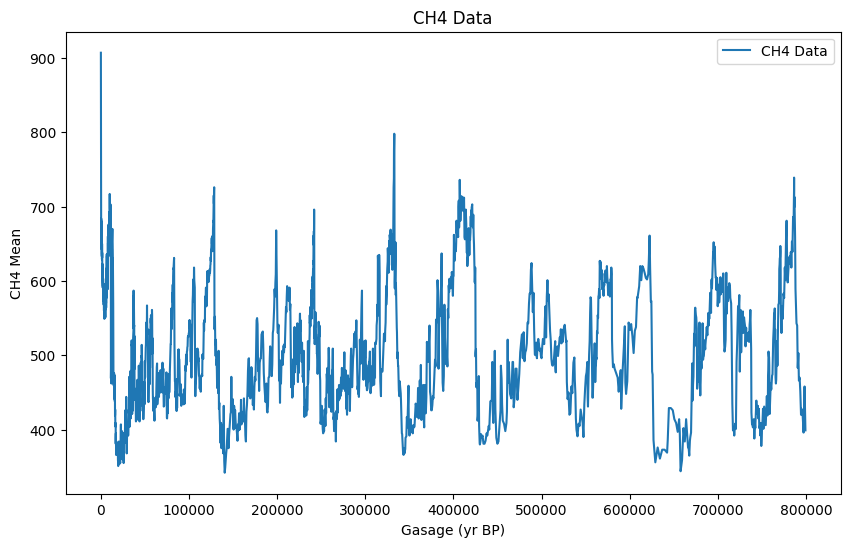

In [40]:
# Plot the merged data.
plt.figure(figsize=(10, 6))
plt.plot(ch4_data['Gasage (yr BP)'], ch4_data['CH4 Mean'], label='CH4 Data')
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CH4 Mean')
plt.title('CH4 Data')
plt.legend()
plt.show()

## Data Analysis
### CO2 vs Temperature Anomaly Analysis

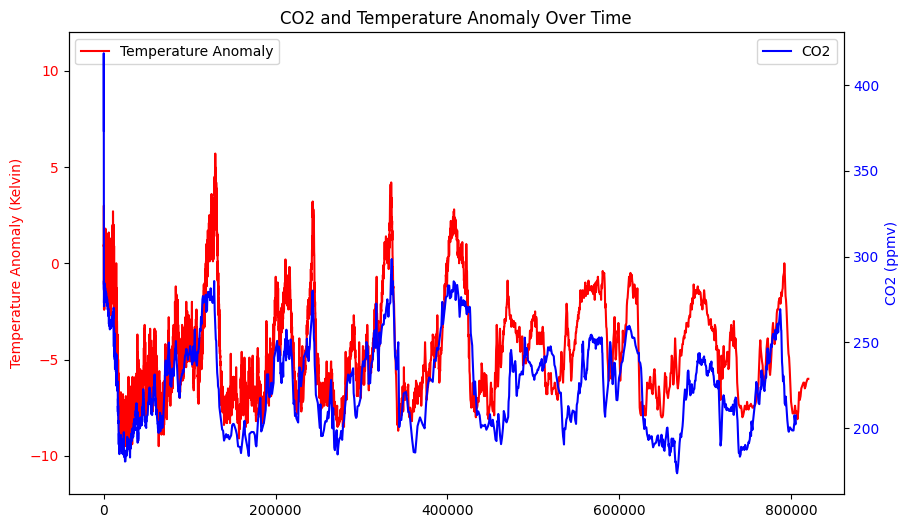

In [28]:
# Create a new figure with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature Anomaly data on the left y-axis
ax1.plot(temp_df['Gasage (yr BP)'], temp_df['Temperature Anomaly (Kelvin)'], label='Temperature Anomaly', color='red')
ax1.set_ylabel('Temperature Anomaly (Kelvin)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Set y-axis limits for the temperature axis
ax1.set_ylim(-12, 12)

# Create a second y-axis for CO2 data
ax2 = ax1.twinx()
ax2.plot(merged_data['Gasage (yr BP)'], merged_data['CO2 (ppmv)'], label='CO2', color='blue')
ax2.set_xlabel('Gasage (yr BP)')
ax2.set_ylabel('CO2 (ppmv)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('CO2 and Temperature Anomaly Over Time')
plt.show()

### Additional Feature Analysis

### Irish Context Analysis

## Data Export

## Temperature Anomaly Prediction

## Conclusion

## References
[1] *Paleoclimatology*, *National Geographic Society*, https://education.nationalgeographic.org/resource/paleoclimatology-RL/
<br>
[2] *Ice Age*, *HISTORY.COM EDITORS*, https://www.history.com/topics/pre-history/ice-age
<br>
[3] *Global Monitoring Laboratory*, *Dr. Pieter Tans* and *Dr. Ralph Keeling*, https://gml.noaa.gov/ccgg/trends/data.html
<br>
[4] *Mauna Loa Observatory*, *National Geographic Society*, https://education.nationalgeographic.org/resource/mauna-loa-observatory/
<br>
[5] *Climate Math*, *Let’s Talk Science*, https://letstalkscience.ca/educational-resources/backgrounders/climate-math
<br>
[6] *EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates*, *Jouzel, J.*, https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt
<br>
[7] *EPICA Dome C Ice Core 800KYr Methane Data*, *Loulergue, L., A. Schilt, R. Spahni, V. Masson-Delmotte, T. Blunier, 
B. Lemieux, J.-M. Barnola, D. Raynaud, T.F. Stocker, and J. Chappellaz*, https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt
<br>
[8] *Methane*, *The Editors of Encyclopaedia Britannica*, https://www.britannica.com/science/methane

***
# End